In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [3]:
fish_df = pd.read_csv('Fish.csv')

In [4]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish_df.columns = [col.lower() for col in fish_df.columns]
fish_df.rename(columns={'length1': 'vertical_length', 'length2': 'diagonal_length', 'length3': 'cross_length'}, inplace=True)

In [7]:
fish_df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          159 non-null    object 
 1   weight           159 non-null    float64
 2   vertical_length  159 non-null    float64
 3   diagonal_length  159 non-null    float64
 4   cross_length     159 non-null    float64
 5   height           159 non-null    float64
 6   width            159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
fish_df.describe()

,weight,vertical_length,diagonal_length,cross_length,height,width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


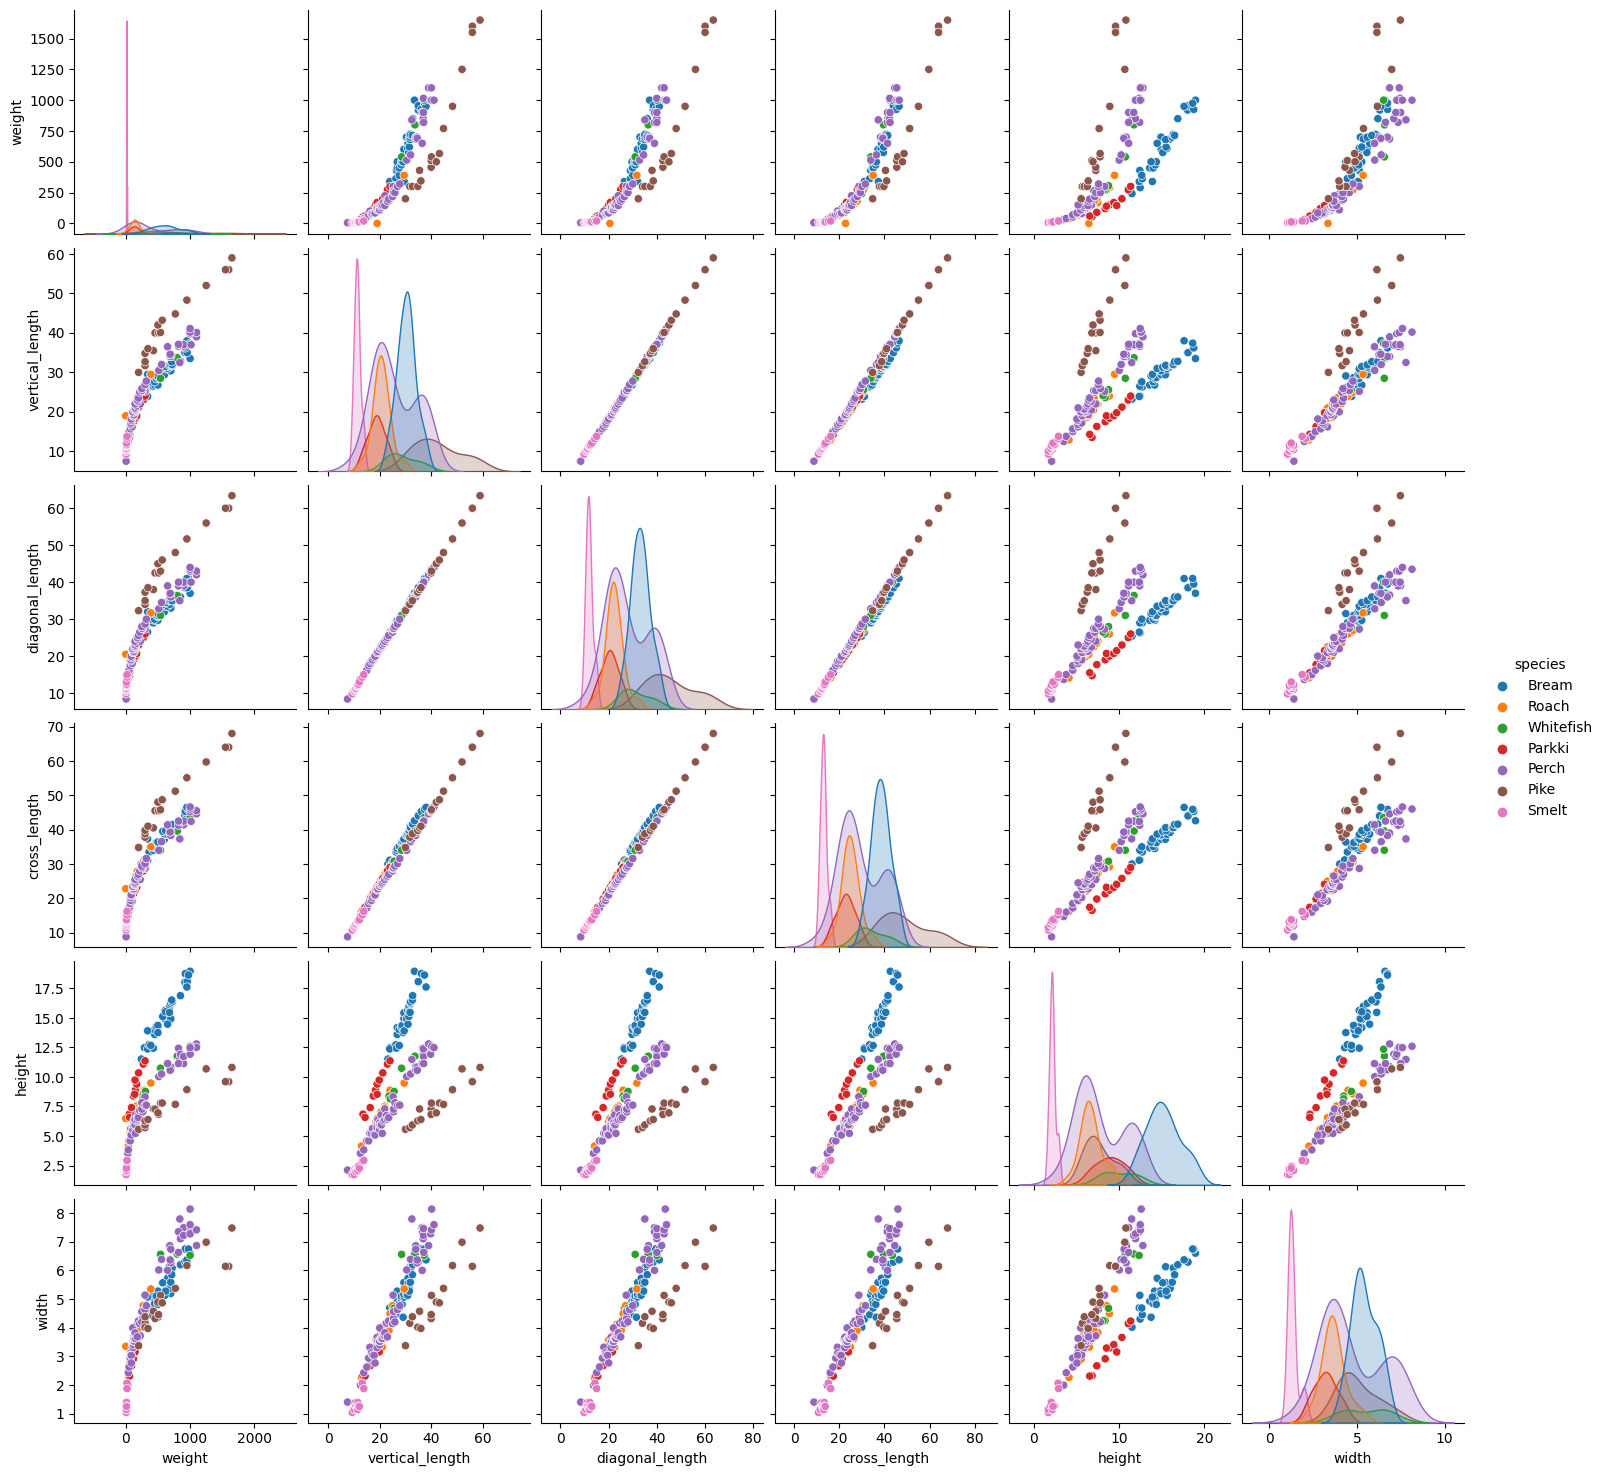

In [37]:
sns.pairplot(fish_df, hue='species');

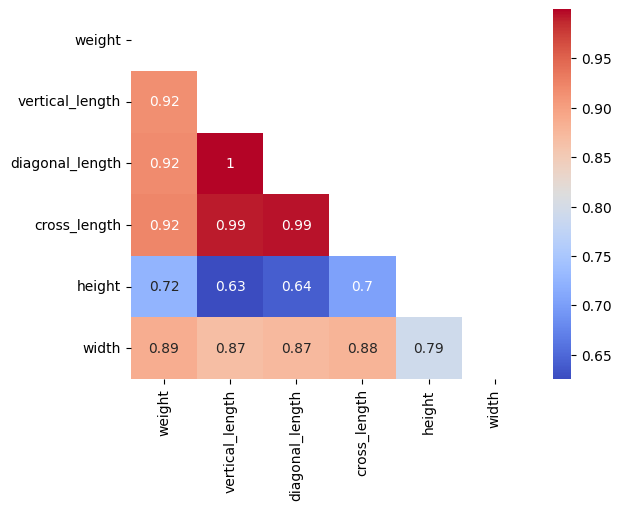

In [36]:
corr_mat = fish_df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', annot=True);

In [48]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
col_transform = make_column_transformer((encoder, ['species']), remainder='passthrough')
transformed_df = pd.DataFrame(col_transform.fit_transform(fish_df), columns=col_transform.get_feature_names())
transformed_df.head()

,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,weight,vertical_length,diagonal_length,cross_length,height,width
0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0.0,0.0,0.0,0.0,0.0,0.0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0.0,0.0,0.0,0.0,0.0,0.0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0.0,0.0,0.0,0.0,0.0,0.0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0.0,0.0,0.0,0.0,0.0,0.0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [51]:
X, y = transformed_df.drop('weight', axis=1), transformed_df['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=4, test_size=0.25)

In [53]:
estimator = RandomForestRegressor()
estimator.fit(X_train, y_train);

In [54]:
estimator.score(X_test, y_test)

0.9637862954719056

In [56]:
r2_score(y_test, estimator.predict(X_test))

0.9637862954719056